In [1]:
import numpy as np
import pandas as pd
#读取数据
df1 = pd.read_excel('D:/实验报告/数据挖掘/antibody.xlsx')
df1.head()

,structureId,macromoleculeType,residueCount,resolution,structureMolecularWeight,densityMatthews,densityPercentSol,pdbxDetailsPDBX,phValue
0,101M,Protein,154,2.07,18112.80,3.09,60.2,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0
1,102M,Protein,154,1.84,18010.64,3.09,60.2,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0
2,103M,Protein,154,2.07,18093.78,3.09,60.3,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0
3,104M,Protein,153,1.71,18030.63,1.87,34.3,"3.0 M AMMONIUM SULFATE, UNBUFFERED, pH 7.0",7.0
4,105M,Protein,153,2.02,18030.63,1.83,33.0,"3.0 M AMMONIUM SULFATE, UNBUFFERED, pH 9.0",9.0


In [27]:
#t特征选取
df2 = df1[["residueCount","resolution","structureMolecularWeight","densityMatthews","densityPercentSol","phValue"]]

<AxesSubplot:xlabel='phValue', ylabel='densityPercentSol'>

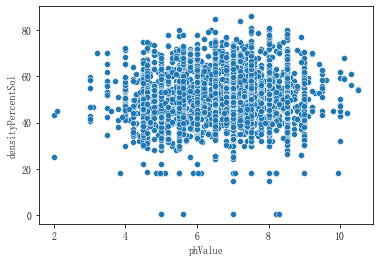

In [3]:
#所有数据点在phValue & densityPercentSol进行可视化
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font',family='FangSong')
sns.scatterplot(x="phValue",y="densityPercentSol",data=df2)

In [5]:
#标准化
from sklearn.preprocessing import StandardScaler
km_df = df2
km_df_standardize = StandardScaler().fit_transform(km_df)
km_df_standardize = pd.DataFrame(data=km_df_standardize,columns=list(km_df.columns))
km_df_standardize.head()

,residueCount,resolution,structureMolecularWeight,densityMatthews,densityPercentSol,phValue
0,-0.650670,-0.135146,-0.644549,0.684653,0.927788,1.806260
1,-0.650670,-0.623670,-0.645926,0.684653,0.927788,1.806260
2,-0.650670,-0.135146,-0.644805,0.684653,0.937873,1.806260
3,-0.652181,-0.899793,-0.645656,-1.233254,-1.684445,0.212795
4,-0.652181,-0.241347,-0.645656,-1.296137,-1.815561,1.806260


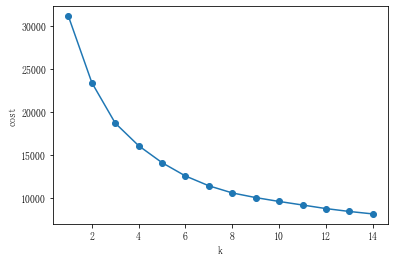

In [9]:
#调参
from scipy.spatial.distance import cdist
from  sklearn.cluster import KMeans# abc
#存放每次结果的误差平方和
cost = [ ]
#尝试不同的聚类个数
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k,random_state=99)
    kmeanModel.fit(km_df_standardize)
    cost.append(kmeanModel.inertia_) 
#肘部法则可视化
plt.xlabel('k')
plt.ylabel('cost')
plt.plot(K,cost,'o-')
plt.show()

In [42]:
#k_mean算法
import pandas as pd

k = 3 #聚类的类别
iteration = 3 #聚类最大循环次数
data_zs = 1.0*(df2 - df2.mean())/df2.std() 
print("结果为：\n",data_zs)

from sklearn.cluster import KMeans
model = KMeans(n_clusters = k, max_iter = iteration) #分为k类
model.fit(data_zs) #开始聚类

#简单打印结果
r1 = pd.Series(model.labels_).value_counts() 
r2 = pd.DataFrame(model.cluster_centers_) 
r = pd.concat([r2, r1], axis = 1) 
print("结果为：\n",r)
r.columns = list(df2.columns) + [u'类别数目'] 
print("结果为：\n",r)

#详细输出原始数据及其类别
r = pd.concat([df2, pd.Series(model.labels_, index = df2.index)], axis = 1) 
r.columns = list(df2.columns) + [u'聚类类别'] 
print("结果为：\n",r)

结果为：
       residueCount  resolution  structureMolecularWeight  densityMatthews  \
0        -0.650608   -0.135133                 -0.644487         0.684587   
1        -0.650608   -0.623610                 -0.645863         0.684587   
2        -0.650608   -0.135133                 -0.644743         0.684587   
3        -0.652119   -0.899706                 -0.645594        -1.233136   
4        -0.652119   -0.241324                 -0.645594        -1.296012   
...            ...         ...                       ...              ...   
5194     -0.280409   -1.345707                 -0.272654        -1.170260   
5195     -0.280409   -0.814754                 -0.274327        -0.855879   
5196     -0.757890   -0.198848                 -0.766673         5.290265   
5197      1.977047    1.415251                  2.036916         1.014687   
5198      1.977047    1.415251                  2.036106         1.014687   

      densityPercentSol   phValue  
0              0.927698  1.806086

C:\Users\34235\AppData\Roaming\Python\Python39\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\34235\AppData\Roaming\Python\Python39\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


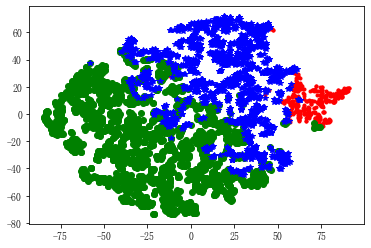

In [41]:
from sklearn.manifold import TSNE
tsne = TSNE()
tsne.fit_transform(data_zs) 
tsne = pd.DataFrame(tsne.embedding_, index = data_zs.index) 

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False 


d = tsne[r[u'聚类类别'] == 0]    
plt.plot(d[0], d[1], 'r.')
d = tsne[r[u'聚类类别'] == 1]
plt.plot(d[0], d[1], 'go')
d = tsne[r[u'聚类类别'] == 2]
plt.plot(d[0], d[1], 'b*')
plt.show()